In [270]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [271]:
%autoreload 2

In [340]:
from dispertrack.model.analyze_waterfall import AnalyzeWaterfall
from dispertrack.model.displacement import msd_iter
from dispertrack.model.util import H, r_d, d_r

In [274]:
%reload_ext dispertrack

In [336]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy
from scipy.optimize import minimize

In [276]:
data = pathlib.Path.home() / pathlib.Path('Data/Waterfall_70nm_1.h5')
if not data.is_file():
    raise Exception('File Not Found')

In [4]:
analysis = AnalyzeWaterfall()
analysis.load_waterfall(data)

In [5]:
analysis.waterfall.shape

(1936, 135404)

In [6]:
analysis.meta['frames']

118470

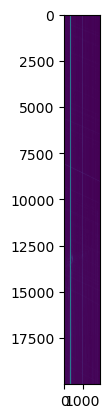

In [7]:
plt.imshow(analysis.waterfall[:, 10000:30000].T)

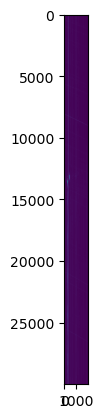

In [8]:
analysis.crop_waterfall(10000, 40000)
plt.imshow(analysis.waterfall.T)

In [9]:
analysis.calculate_background()

In [10]:
analysis.denoise()

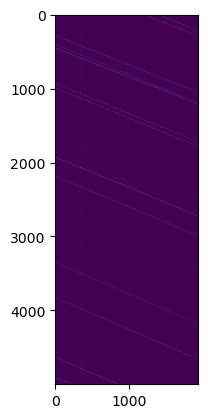

In [11]:
plt.imshow(analysis.corrected_data[:, 0:5000].T)

In [46]:
analysis.calculate_mask(threshold=50, min_size=20, max_gap=200)

In [306]:
analysis.label_mask(min_len=100)

In [307]:
for i, pcle in enumerate(analysis.filtered_props):
    print(i, len(pcle))

0 10643
1 8924
2 4026
3 1348
4 1249
5 1691
6 1359
7 2371
8 1346
9 9493
10 8782
11 7537
12 9163
13 1497
14 8478
15 6179
16 7403
17 1458
18 8051
19 7237
20 2185
21 1076
22 2970
23 1155
24 1066
25 925
26 1685
27 5602
28 1240
29 1203
30 4377
31 1925
32 1017
33 4052
34 4605
35 1586
36 1191
37 6308
38 976
39 1698
40 3407
41 1024
42 773
43 1307
44 1820
45 1092
46 3253
47 1549
48 1066


In [314]:
analysis.analyze_traces()

/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Docum

In [320]:
np.mean(analysis.waterfall[:, :10])

526.9574896694215

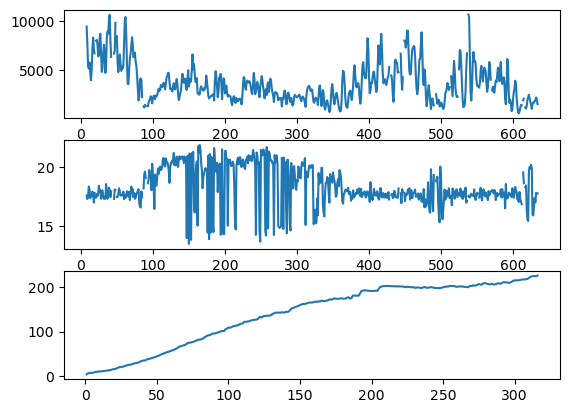

In [316]:
fig, ax = plt.subplots(3)
ax[0].plot(analysis.pcle_data[0]['intensity'])
ax[1].plot(analysis.pcle_data[0]['position'])
ax[2].plot(analysis.pcle_data[0]['MSD']['MSD'])

In [110]:
data = sliced_data[:, 1:]
centers = sliced_data[:, 0]

In [111]:
fiber_width_pixl = 412
fiber_width = 180E-6
pixl = fiber_width / fiber_width_pixl

In [267]:
separation = 20
radius = 7
threshold = 50
intensities, positions = analysis.calculate_intensities_cropped(data, separation, radius, threshold)

/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)


In [113]:
position = positions*pixl
center = centers*pixl

In [114]:
position = position + center

In [116]:
X = np.arange(len(position))
X = X[~np.isnan(position)]
clean_position = position[~np.isnan(position)]

In [117]:
fit = np.polyfit(X, clean_position, 1)
position = position - np.polyval(fit, np.arange(len(position)))

In [127]:
lagtimes = np.arange(1, int(len(position) / 2))

In [128]:
MSD = pd.DataFrame(msd_iter(position, lagtimes=lagtimes), columns=['MD', 'MSD'], index=lagtimes)

<AxesSubplot:>

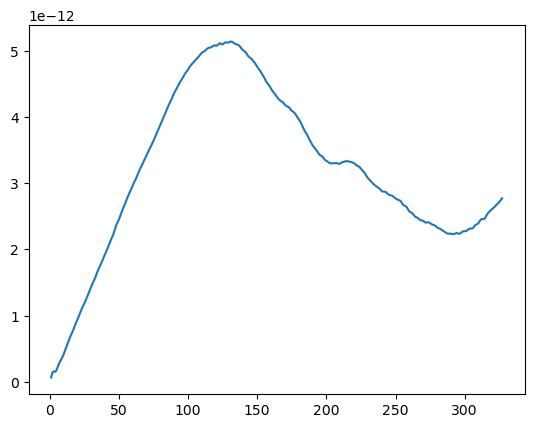

In [133]:
MSD['MSD'].plot()

In [196]:
C = 560E-9  # core diameter
T = 300
k_b = 1.380649E-23
eta = 0.0009532

In [214]:
lagtimes = np.arange(1, 5) / analysis.meta['fps']

In [215]:
diffusion = np.polyfit(lagtimes, MSD['MSD'].array[:len(lagtimes)], 1)

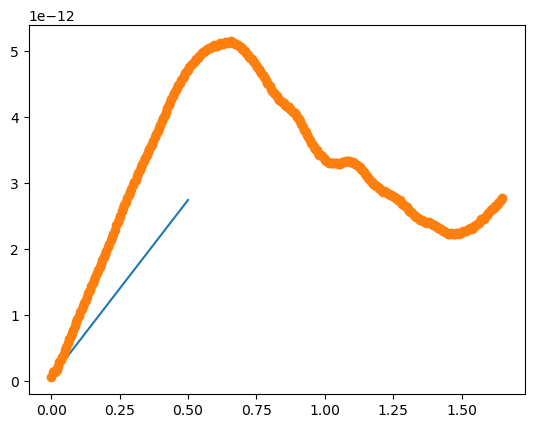

In [216]:
t = np.arange(0, 100) / analysis.meta['fps']
plt.plot(t, np.polyval(diffusion, t))
plt.plot(np.arange(0, len(MSD)) / analysis.meta['fps'], MSD['MSD'], 'o')

In [338]:
D = diffusion[0]

In [326]:
C = 560E-9  # core diameter
T = 300
k_b = 1.380649E-23
eta = 0.0009532

In [395]:
analysis.calculate_particle_properties()

/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:336: RuntimeWarning: divide by zero encountered in divide
  


In [398]:
radiuses = [analysis.pcle_data[i]['r'] for i in analysis.pcle_data.keys()]

(array([ 4.,  5.,  0.,  0.,  0.,  2., 32.,  0.,  4.,  2.]),
 array([4.79659319e-08, 4.83014028e-08, 4.86368737e-08, 4.89723447e-08,
        4.93078156e-08, 4.96432866e-08, 4.99787575e-08, 5.03142285e-08,
        5.06496994e-08, 5.09851703e-08, 5.13206413e-08]),
 <BarContainer object of 10 artists>)

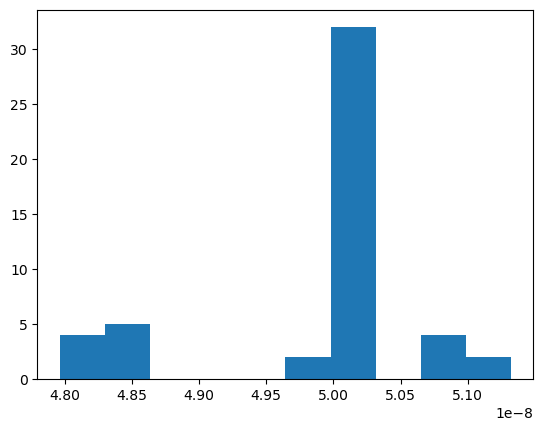

In [400]:
plt.hist(radiuses)